In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

import glob
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import PIL
from PIL import Image

In [2]:
train_chi  = "../input/muffin-vs-chihuahua-image-classification/train/chihuahua"
train_muff = "../input/muffin-vs-chihuahua-image-classification/train/muffin"
test_chi   = "../input/muffin-vs-chihuahua-image-classification/test/chihuahua"
test_muff  = "../input/muffin-vs-chihuahua-image-classification/test/muffin"

In [3]:
data = {
    'class': [],
    'file_name': [],
    'pixels': []
}

def image_sort(path, dic):
    dof = path.split('/')
    for image in glob.glob(path + '/*.jpg'):
        dic['class'] += [dof[-1]]
        img_name = image.split('/')
        dic['file_name'] += [img_name[-1]]
        pixel = PIL.Image.open(image).resize((48,48)).convert("RGB")
        pixels = np.array(pixel,dtype='float32').reshape(-1)
        dic['pixels'] += [pixels]

In [4]:
image_sort(train_chi,data)
image_sort(train_muff,data)

In [5]:
df = pd.DataFrame(data)

df

,class,file_name,pixels
0,chihuahua,img_0_746.jpg,"[253.0, 253.0, 253.0, 255.0, 255.0, 255.0, 255..."
1,chihuahua,img_1_1221.jpg,"[151.0, 154.0, 145.0, 155.0, 157.0, 148.0, 154..."
2,chihuahua,img_3_835.jpg,"[244.0, 226.0, 219.0, 244.0, 225.0, 218.0, 244..."
3,chihuahua,img_0_123.jpg,"[93.0, 108.0, 43.0, 99.0, 110.0, 47.0, 102.0, ..."
4,chihuahua,img_0_919.jpg,"[255.0, 215.0, 207.0, 255.0, 215.0, 207.0, 255..."
...,...,...,...
4728,muffin,img_4_409.jpg,"[175.0, 163.0, 128.0, 209.0, 192.0, 155.0, 229..."
4729,muffin,img_2_1058.jpg,"[224.0, 224.0, 224.0, 225.0, 225.0, 225.0, 223..."
4730,muffin,img_0_1021.jpg,"[134.0, 126.0, 156.0, 112.0, 107.0, 132.0, 103..."
4731,muffin,img_0_82.jpg,"[251.0, 248.0, 243.0, 251.0, 248.0, 243.0, 251..."


In [6]:
some = len(df['pixels'].iloc[0])
something = []
for i in range(4733):
    if len(df['pixels'].iloc[i])!=some:
        something.append(i)
        
print(something)

len(df['pixels'].iloc[553]),len(df['pixels'].iloc[881]),len(df['pixels'].iloc[1581]),some

# 553, 881, 1581 has I think 32x24... It was different from all other stuffs

[]


(6912, 6912, 6912, 6912)

In [7]:
df['pixels']= df['pixels'].apply(lambda x: x/255)

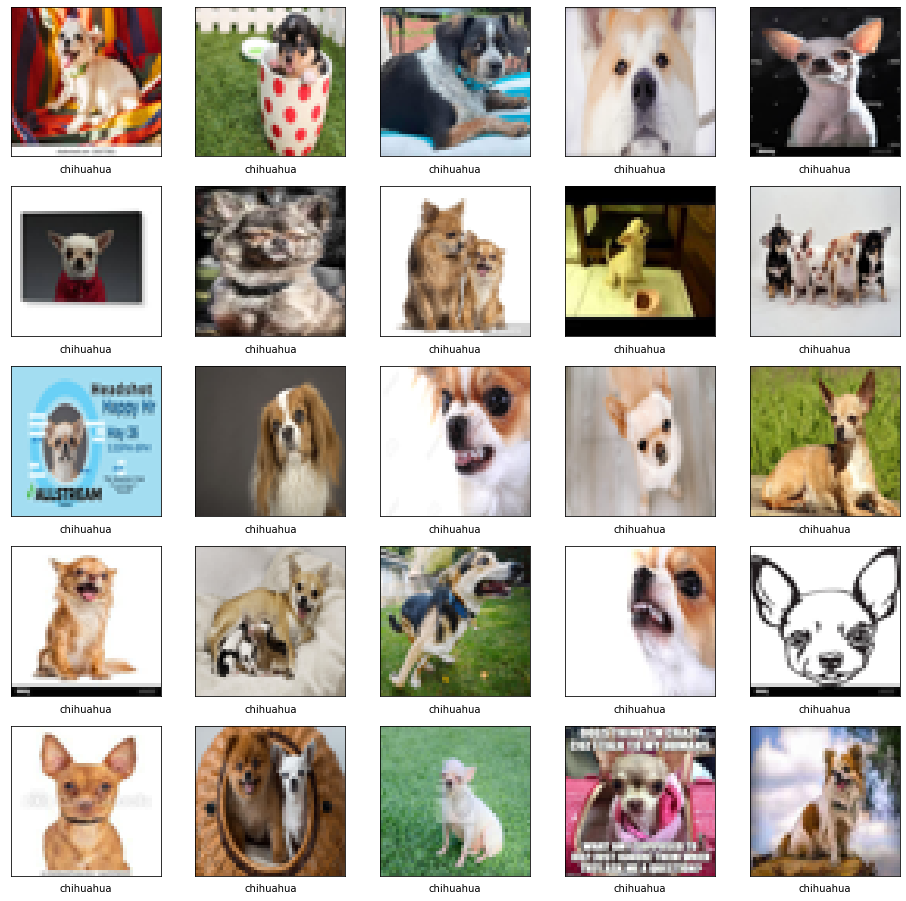

In [8]:
plt.figure(figsize = (16,16))

for i in range(1500,1525):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48,3))
    plt.xlabel(df['class'].iloc[i])

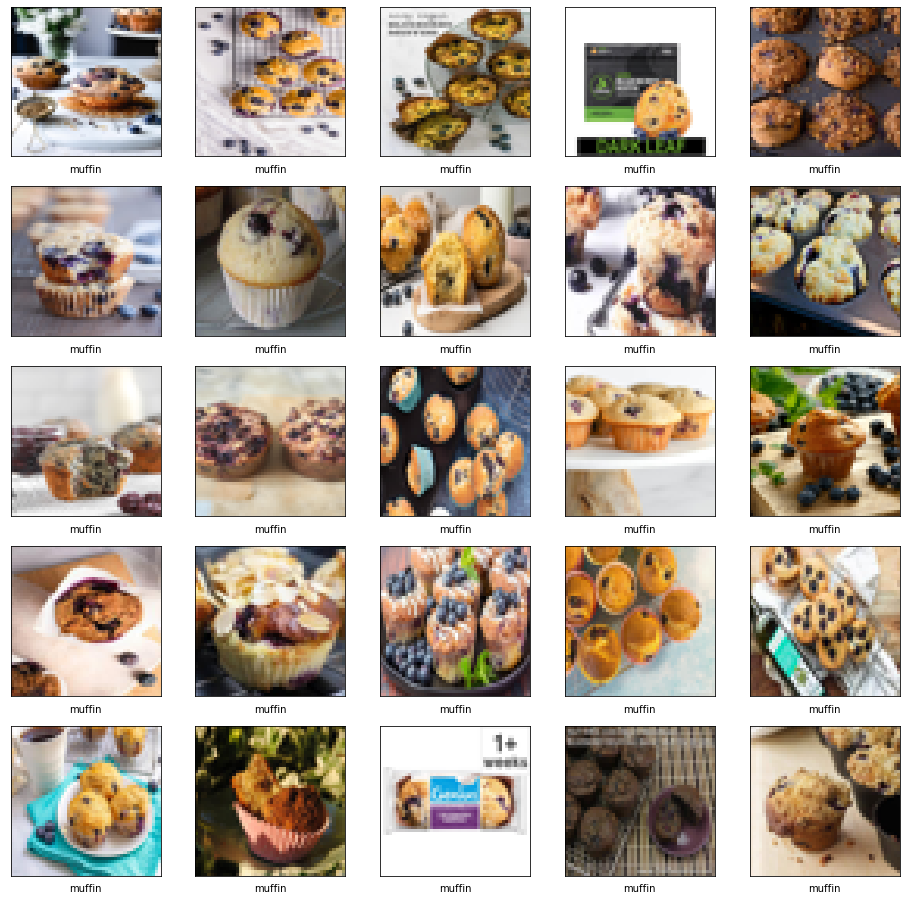

In [9]:
plt.figure(figsize = (16,16))

for i in range(3500,3525):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48,3))
    plt.xlabel(df['class'].iloc[i])

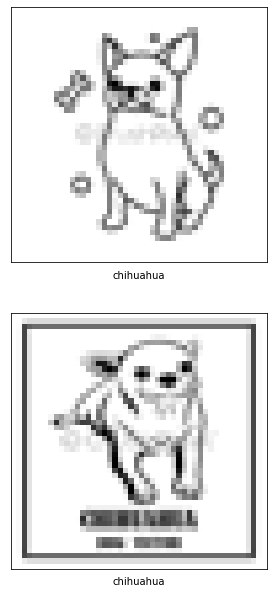

In [10]:
plt.figure(figsize = (16,16))

for i in [553, 881, 1581]:
    plt.subplot(3,3,(i%25))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(df['pixels'].iloc[i].reshape(48,48,3))
    plt.xlabel(df['class'].iloc[i])

In [11]:
df['class'] = df['class'].replace(['chihuahua'],0)
df['class'] = df['class'].replace(['muffin'],1)

df['class']

0       0
1       0
2       0
3       0
4       0
       ..
4728    1
4729    1
4730    1
4731    1
4732    1
Name: class, Length: 4733, dtype: int64

In [12]:
X = np.array(df['pixels'].tolist())

X

array([[0.99215686, 0.99215686, 0.99215686, ..., 1.        , 1.        ,
        1.        ],
       [0.5921569 , 0.6039216 , 0.5686275 , ..., 0.73333335, 0.6666667 ,
        0.5372549 ],
       [0.95686275, 0.8862745 , 0.85882354, ..., 0.95686275, 0.88235295,
        0.85490197],
       ...,
       [0.5254902 , 0.49411765, 0.6117647 , ..., 0.10980392, 0.09019608,
        0.06666667],
       [0.9843137 , 0.972549  , 0.9529412 , ..., 0.41960785, 0.31764707,
        0.21176471],
       [0.94509804, 0.94509804, 0.94509804, ..., 0.93333334, 0.93333334,
        0.9490196 ]], dtype=float32)

In [13]:
X = X.reshape(X.shape[0],48, 48, 3)

X.shape

(4733, 48, 48, 3)

In [14]:
y = df['class']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.22,random_state = 26)

In [16]:
model = tf.keras.Sequential([
    layers.InputLayer(input_shape=[48,48,3]),
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1,activation = 'sigmoid')
])

2023-01-04 07:14:55.401607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-04 07:14:55.525678: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-04 07:14:55.526481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-04 07:14:55.528093: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [17]:
model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['binary_accuracy']
)

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                409664    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

In [19]:
model.fit(X_train,y_train, epochs = 15, batch_size = 30)

2023-01-04 07:14:58.507782: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2023-01-04 07:14:59.750860: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


124/124 [==============================] - 7s 4ms/step - loss: 0.6822 - binary_accuracy: 0.5538
Epoch 2/15
124/124 [==============================] - 0s 3ms/step - loss: 0.6514 - binary_accuracy: 0.6207
Epoch 3/15
124/124 [==============================] - 0s 3ms/step - loss: 0.6128 - binary_accuracy: 0.6708
Epoch 4/15
124/124 [==============================] - 0s 3ms/step - loss: 0.5736 - binary_accuracy: 0.7055
Epoch 5/15
124/124 [==============================] - 0s 3ms/step - loss: 0.5555 - binary_accuracy: 0.7269
Epoch 6/15
124/124 [==============================] - 0s 3ms/step - loss: 0.5308 - binary_accuracy: 0.7453
Epoch 7/15
124/124 [==============================] - 0s 3ms/step - loss: 0.5136 - binary_accuracy: 0.7570
Epoch 8/15
124/124 [==============================] - 0s 3ms/step - loss: 0.5585 - binary_accuracy: 0.7350
Epoch 9/15
124/124 [==============================] - 0s 3ms/step - loss: 0.4996 - binary_accuracy: 0.7757
Epoch 10/15
124/124 [===========================

In [20]:
test_data = {
    'file_name': [],
    'pixels': []
}

In [21]:
def image_sort_test(path, dic):
    for image in glob.glob(path + '/*.jpg'):
        img_name = image.split('/')
        dic['file_name'] += [img_name[-1]]
        pixel = PIL.Image.open(image).resize((48,48)).convert("RGB")
        pixels = np.array(pixel,dtype='float32').reshape(-1)
        dic['pixels'] += [pixels]

In [22]:
image_sort_test(test_chi,test_data)
image_sort_test(test_muff,test_data)

In [23]:
test_df = pd.DataFrame(test_data)

test_df

,file_name,pixels
0,img_4_684.jpg,"[142.0, 131.0, 127.0, 137.0, 132.0, 125.0, 133..."
1,img_0_340.jpg,"[101.0, 89.0, 74.0, 98.0, 88.0, 81.0, 170.0, 1..."
2,img_2_792.jpg,"[56.0, 91.0, 3.0, 64.0, 101.0, 1.0, 64.0, 98.0..."
3,img_2_443.jpg,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255..."
4,img_2_105.jpg,"[72.0, 115.0, 44.0, 73.0, 117.0, 45.0, 73.0, 1..."
...,...,...
1179,img_2_280.jpg,"[160.0, 130.0, 150.0, 128.0, 88.0, 100.0, 163...."
1180,img_0_801.jpg,"[211.0, 208.0, 225.0, 213.0, 211.0, 224.0, 215..."
1181,img_3_419.jpg,"[159.0, 90.0, 2.0, 148.0, 80.0, 2.0, 125.0, 66..."
1182,img_0_187.jpg,"[250.0, 252.0, 252.0, 253.0, 253.0, 253.0, 253..."


In [24]:
test_df_shuffled = test_df.sample(frac = 0.5,random_state = 26)

test_df_shuffled

,file_name,pixels
627,img_2_712.jpg,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255..."
17,img_4_929.jpg,"[151.0, 144.0, 151.0, 154.0, 148.0, 155.0, 151..."
865,img_4_422.jpg,"[184.0, 185.0, 189.0, 186.0, 187.0, 191.0, 186..."
526,img_2_455.jpg,"[21.0, 21.0, 21.0, 23.0, 23.0, 23.0, 26.0, 26...."
568,img_0_72.jpg,"[200.0, 203.0, 218.0, 194.0, 203.0, 220.0, 153..."
...,...,...
154,img_0_774.jpg,"[41.0, 26.0, 19.0, 36.0, 21.0, 18.0, 39.0, 24...."
240,img_3_1043.jpg,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255..."
1143,img_4_859.jpg,"[52.0, 58.0, 65.0, 44.0, 51.0, 55.0, 43.0, 48...."
165,img_3_351.jpg,"[255.0, 255.0, 255.0, 255.0, 255.0, 255.0, 255..."


In [25]:
test_df_shuffled['pixels']= test_df_shuffled['pixels'].apply(lambda x: x/255)

In [26]:
test_X = np.array(test_df_shuffled['pixels'].tolist())

In [27]:
test_X = test_X.reshape(test_X.shape[0],48, 48, 3)

test_X[0].shape

(48, 48, 3)

In [28]:
prediction = model.predict(test_X)

In [29]:
test_df_target = pd.DataFrame(prediction)

test_df_target.columns = ['class']

test_df_target

,class
0,0.986632
1,0.913944
2,0.988994
3,0.615249
4,0.944598
...,...
587,0.920108
588,0.920424
589,0.968129
590,0.931569


In [30]:
test_df_target = test_df_target.round(0)

test_df_target = test_df_target.astype('int')

test_df_target = test_df_target.astype('str')

test_df_target

,class
0,1
1,1
2,1
3,1
4,1
...,...
587,1
588,1
589,1
590,1


In [31]:
test_df_target['class'] = test_df_target['class'].replace(['0'],['chihuahua'])
test_df_target['class'] = test_df_target['class'].replace(['1'],['muffin'])

test_df_target['class']

0      muffin
1      muffin
2      muffin
3      muffin
4      muffin
        ...  
587    muffin
588    muffin
589    muffin
590    muffin
591    muffin
Name: class, Length: 592, dtype: object

In [32]:
test_df_shuffled = test_df_shuffled.reset_index(drop=True)
test_df_shuffled

,file_name,pixels
0,img_2_712.jpg,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
1,img_4_929.jpg,"[0.5921569, 0.5647059, 0.5921569, 0.6039216, 0..."
2,img_4_422.jpg,"[0.72156864, 0.7254902, 0.7411765, 0.7294118, ..."
3,img_2_455.jpg,"[0.08235294, 0.08235294, 0.08235294, 0.0901960..."
4,img_0_72.jpg,"[0.78431374, 0.79607844, 0.85490197, 0.7607843..."
...,...,...
587,img_0_774.jpg,"[0.16078432, 0.101960786, 0.07450981, 0.141176..."
588,img_3_1043.jpg,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."
589,img_4_859.jpg,"[0.20392157, 0.22745098, 0.25490198, 0.1725490..."
590,img_3_351.jpg,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [33]:
test_fin = pd.concat([test_df_shuffled,test_df_target],axis =1)

test_fin

,file_name,pixels,class
0,img_2_712.jpg,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",muffin
1,img_4_929.jpg,"[0.5921569, 0.5647059, 0.5921569, 0.6039216, 0...",muffin
2,img_4_422.jpg,"[0.72156864, 0.7254902, 0.7411765, 0.7294118, ...",muffin
3,img_2_455.jpg,"[0.08235294, 0.08235294, 0.08235294, 0.0901960...",muffin
4,img_0_72.jpg,"[0.78431374, 0.79607844, 0.85490197, 0.7607843...",muffin
...,...,...,...
587,img_0_774.jpg,"[0.16078432, 0.101960786, 0.07450981, 0.141176...",muffin
588,img_3_1043.jpg,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",muffin
589,img_4_859.jpg,"[0.20392157, 0.22745098, 0.25490198, 0.1725490...",muffin
590,img_3_351.jpg,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",muffin


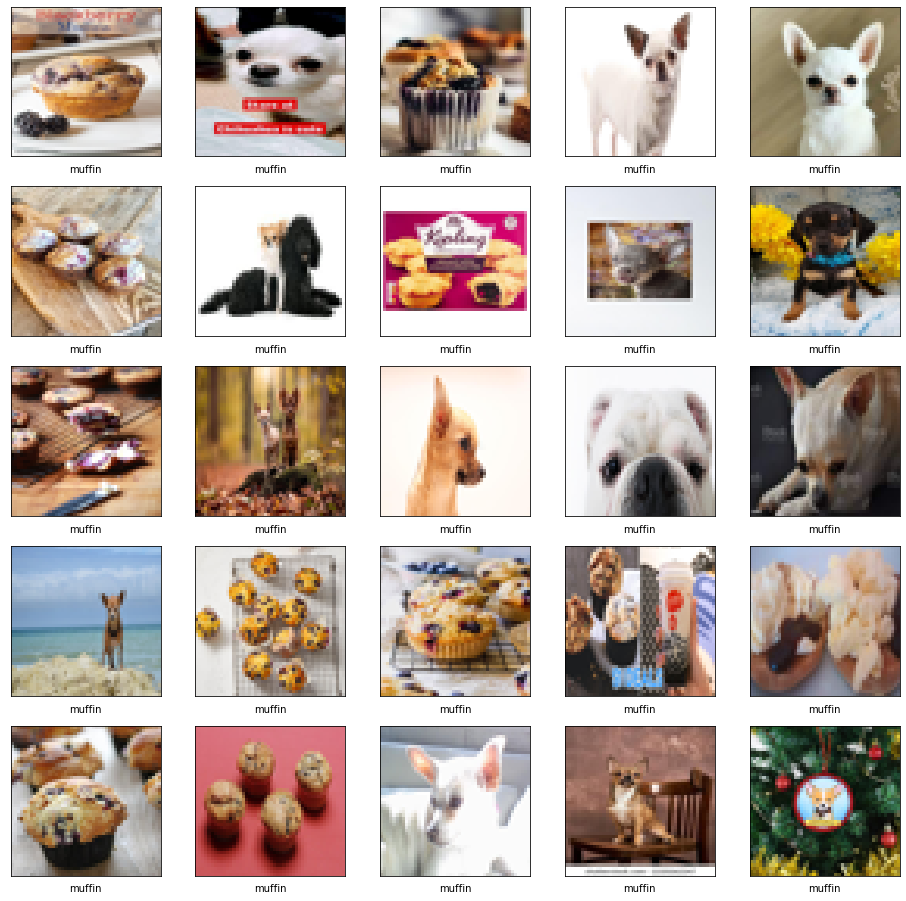

In [34]:
plt.figure(figsize = (16,16))

for i in range(100,125):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_fin['pixels'].iloc[i].reshape(48,48,3))
    plt.xlabel(test_fin['class'].iloc[i])